# 5.13. Inne popularne metody klasyfikacji

Oczywiście spektrum metod klasyfikacji nie jest ograniczony do wyłącznie trzech algorytmów. W rozdziale dotyczącym regresji wspomnieliśmy już drzewa decyzyjne i ich pochodne. Mogą być one wykorzystywane z sukcesami również w problemach klasyfikacji. Scikit-learn oczywiście udostępnia gotową implementację, a jej nauczenie przebiega w sposób identyczny jak wtedy gdy przewidywaliśmy wartości numeryczne.

## Sieci neuronowe

Wspomnimy pokrótce najbardziej popularną metodę ML, czyli sieci neuronowe. Podejdziemy do tematu dość narzędziowo, nie zagłębiając się specjalnie w algorytmy uczenia sieci. Skorzystamy oczywiście z gotowej implementacji, dzięki czemu unikniemy problemów implementacyjnych. 

Stwórzmy zbiór danych - ten sam, co w rozdziale 5.10. dla zobrazowania algorytmu SVM.

In [5]:
import pandas as pd
import numpy as np

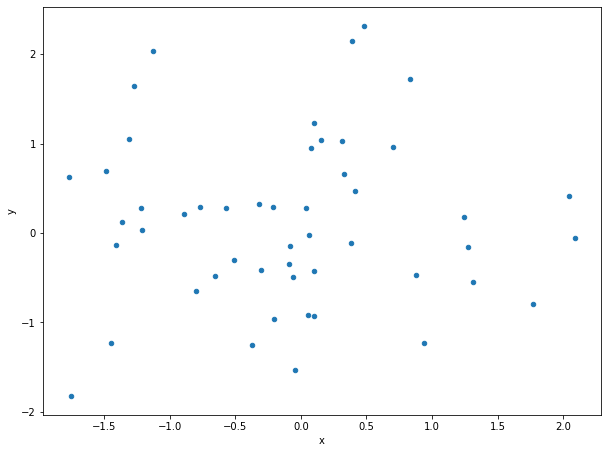

In [6]:
np.random.seed(2020)

one_df = pd.DataFrame({
    "x": np.random.normal(size=50),
    "y": np.random.normal(size=50),
})

one_df.plot.scatter(x="x", y="y", 
                    figsize=(10.0, 7.5))

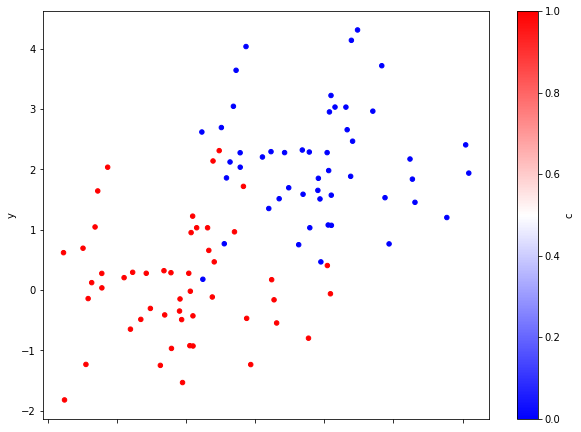

In [7]:
blobs_df = pd.concat([
    one_df.assign(c=1),
    (one_df + 2).assign(c=0),
])

blobs_df.plot.scatter(x="x", y="y", c="c",
                      cmap="bwr",
                      figsize=(10.0, 7.5))

Stworzymy klasyfikator oparty o sieci neuronowe, który będzie starał się rozwiązać ten sam problem jak poprzednio. Na koniec wyświetlimy granice decyzyjne, żeby zobaczyć jak tym razem model starał się odseparować poszczególne przykłady.

### Podstawowy schemat działania sieci

Sieć neuronowa, składa się z wielu warstw prostych jednostek przetwarzania zwanych neuronami. Rzućmy okiem na podstawowy schemat działania jednego prostego neuronu, żeby złapać intuicję co do jego działania.

$$ y(x) = f(\sum_{i=1}^{N}{w_{i}x_{i}}) $$

Gdzie $ y $ jest wyjściowym sygnałem neuronu, $ w $ wektorem wag dla tego neuronu, $ x $ wektorem wejściowym, a $ f $ pewną nieliniową funkcją tzw. *funkcją aktywacji*. Proces nauczania dostosowuje iteracyjne wagi pojedynczego neuronu, aby zwracał on oczekiwaną wartość.

Sieć neuronowa jest strukturą złożoną z następujących po sobie warstw neuronów. Każda warstwa ma pewien rozmiar, który oznacza jak wiele neuronów zawiera. Dla każdego neuronu możemy także ustalić inna funkcję aktywacji, jednak typowo ustala się tę samą funkcję dla warstwy, a nawet całej sieci.

In [8]:
from sklearn.neural_network import MLPClassifier

In [54]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 25, 10, 8, 8, 6), 
                    activation="tanh", max_iter=100000)
mlp.fit(blobs_df.drop(columns="c"), blobs_df["c"])

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 25, 10, 8, 8, 6),
              learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
              max_iter=100000, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=None,
              shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
              verbose=False, warm_start=False)

In [55]:
x_test = np.linspace(-2, 5, 1000)
y_test = np.linspace(-2, 5, 1000)
xx, yy = np.meshgrid(x_test, y_test)

In [56]:
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()]) \
    .reshape(xx.shape)

In [57]:
import matplotlib.pyplot as plt

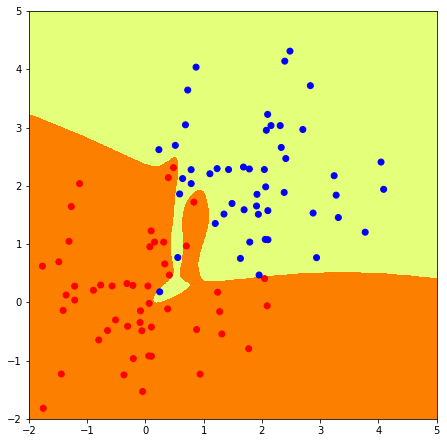

In [58]:
plt.figure(figsize=(10.5, 7.5))
plt.imshow(Z, interpolation="nearest",
           extent=(-2, 5, -2, 5),
           cmap="Wistia", origin="lower")
plt.scatter(blobs_df["x"], blobs_df["y"], 
            c=blobs_df["c"], cmap="bwr")

Model, który stworzyliśmy, jest prawdopodobnie przeuczony, jednak dobierając odpowiednio parametry sieci, takie jak liczba warstw uczących oraz funkcja aktywacji, jesteśmy w stanie sterować zachowaniem powstałej funkcji decyzyjnej, a metody walidacji krzyżowej pomogą nam sprawdzić czy nie nastapił overfitting.